In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
# Draw inline
%matplotlib inline
sns.set_style("white", {'ytick.major.size': 10.0})
sns.set_context("poster", font_scale = 1.1)

In [2]:
warnings.filterwarnings('ignore')

In [3]:
combat = pd.read_csv("combats.csv")
pokemon = pd.read_csv("pokemon.csv")
tests = pd.read_csv("tests.csv")

In [4]:
combat.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [5]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [6]:
tests.head()

,First_pokemon,Second_pokemon
0,129,117
1,660,211
2,706,115
3,195,618
4,27,656


In [4]:
import matplotlib.pyplot as plt
from math import pi as pi

In [5]:
#st = np.zeros(6)
records = {}
check = set()
fea = pokemon[['Type 1','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]

nameList = list(fea['Type 1'].unique())
#print(nameList)
#for i in range(len('#')):
features = pd.DataFrame(columns=['Type 1','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'])
num = 0
for name in nameList:
    #print(name)
    re = fea[fea['Type 1']== name]
    re_ave = re.mean()
    #print(re_ave['HP'])
    df2 = pd.DataFrame({'Type 1': name,
                   'HP': re_ave['HP'],
                   'Attack':re_ave['Attack'],
                   'Defense': re_ave['Defense'],
                    'Sp. Atk': re_ave['Sp. Atk'],
                    'Sp. Def': re_ave['Sp. Def'],
                    'Speed': re_ave['Speed']},columns=['Type 1','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed'],
                      index=[num])
    features = pd.concat([features,df2])
    num+=1
    
    #print(related)

print(features)






    
    
    
    

      Type 1         HP      Attack     Defense    Sp. Atk    Sp. Def  \
0      Grass  67.271429   73.214286   70.800000  77.500000  70.428571   
1       Fire  69.903846   84.769231   67.769231  88.980769  72.211538   
2      Water  72.062500   74.151786   72.946429  74.812500  70.517857   
3        Bug  56.884058   70.971014   70.724638  53.869565  64.797101   
4     Normal  77.275510   73.469388   59.846939  55.816327  63.724490   
5     Poison  67.250000   74.678571   68.821429  60.428571  64.392857   
6   Electric  59.795455   69.090909   66.295455  90.022727  73.704545   
7     Ground  73.781250   95.750000   84.843750  56.468750  62.750000   
8      Fairy  74.117647   61.529412   65.705882  78.529412  84.705882   
9   Fighting  69.851852   96.777778   65.925926  53.111111  64.703704   
10   Psychic  70.631579   71.456140   67.684211  98.403509  86.280702   
11      Rock  65.363636   92.863636  100.795455  63.340909  75.477273   
12     Ghost  64.437500   73.781250   81.187500  79

In [158]:
def make_spider( row, title, color):
    # number of variable
    categories=list(features)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(6,3,row+1, polar=True, )
    plt.tight_layout()

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,90)

    # Ind1
    values=features.loc[row].drop('Type 1').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.5)


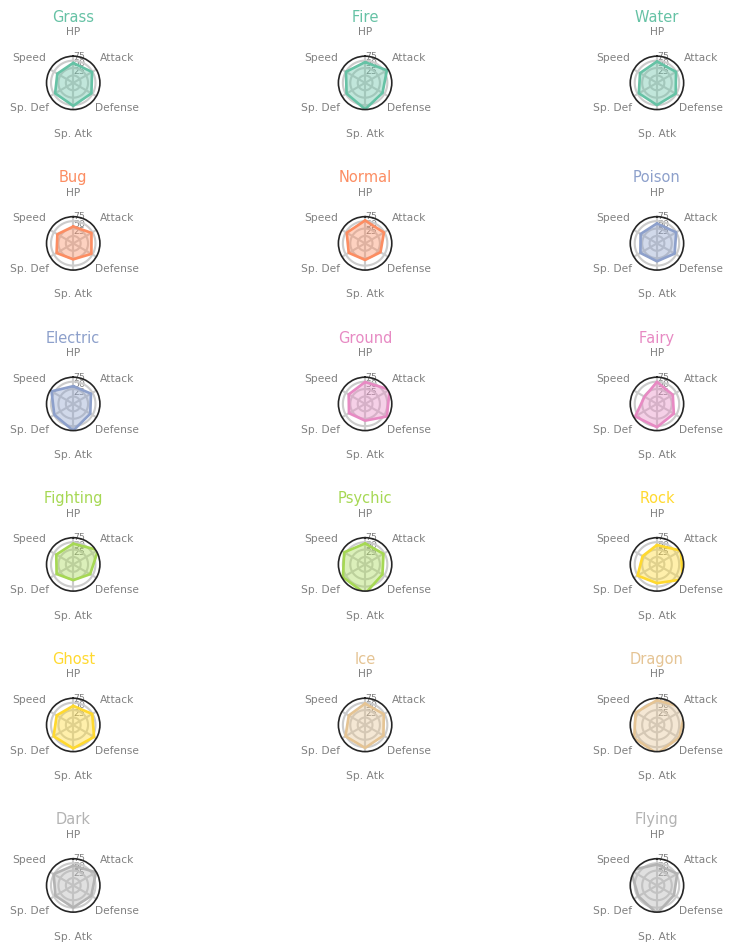

In [160]:
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(features.index))
 
# Loop to plot
for row in range(0, len(features.index)):
    make_spider( row=row, title= features['Type 1'][row], color=my_palette(row))


In [55]:
def fig2(i,j,fea_list,need_fea,p1,p2):
        plt.tight_layout()
        label1 = fea_list[i]
        label2 = fea_list[j]
        arr1 = need_fea[i]
        arr2 = need_fea[j]
        # We can control the size of the bins:
        ax[p1, p2].hexbin(arr1, arr2, gridsize=(150,150), cmap=plt.cm.BuGn_r)
        #ax[p1, p2].colorbar()
        ax[p1, p2].set_title(fea_list[i]+' and '+fea_list[j],size = 11,y = 1.1)
        #x.figure(figsize=(80,90))
    

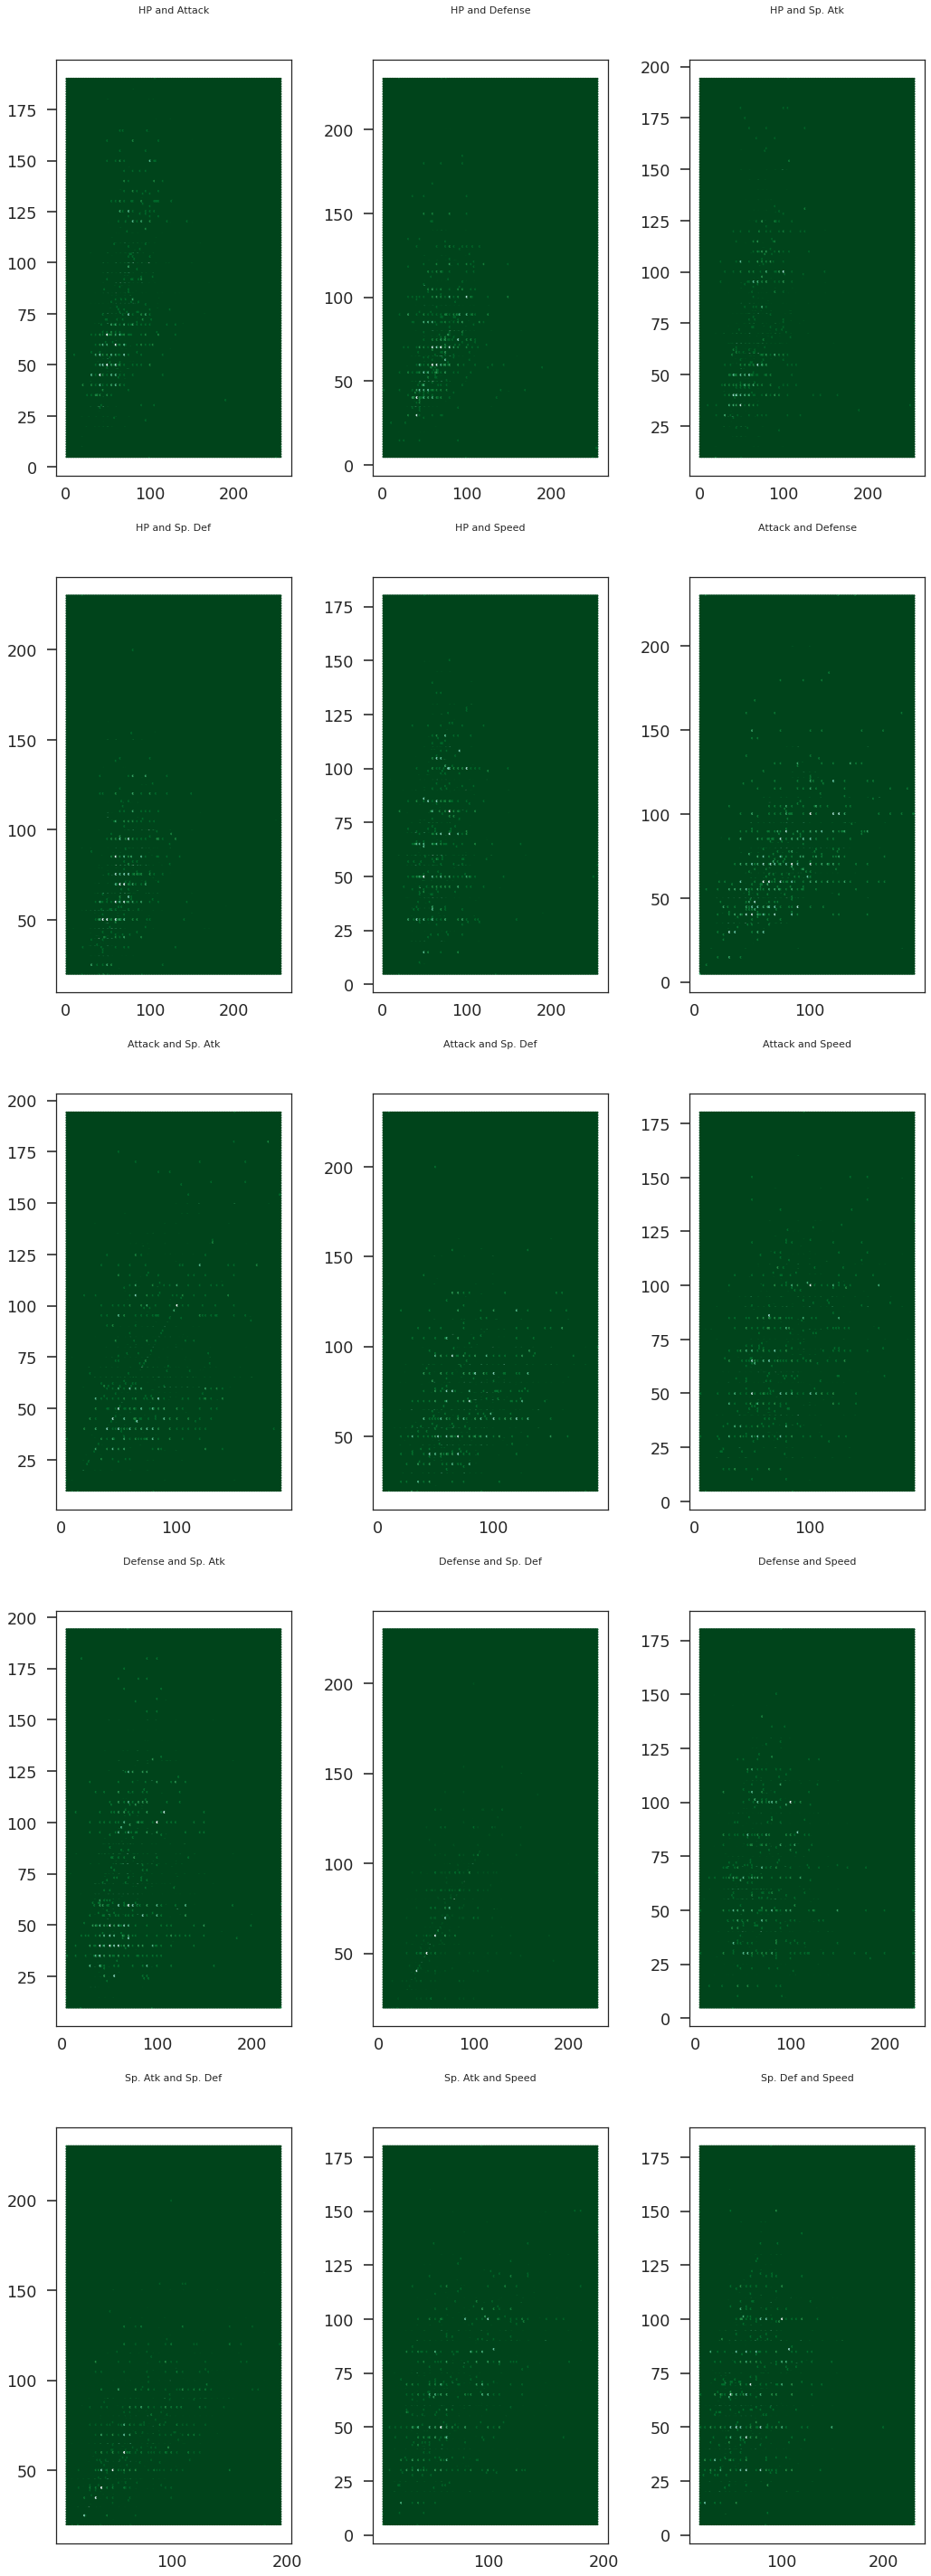

In [58]:
# relation between the 
 
# create data
fea_list = ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']
need_fea = [pokemon[name].tolist() for name in ['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]

index = 0
f, ax = plt.subplots(5,3,sharex=False, sharey=False,figsize=(15,40))
#plt.figure(figsize=(150,150))
for i in range(0,len(fea_list)):
    for j in range(i+1,len(fea_list)):
        p1 = int(index/3)
        p2 = index%3
        index+=1
        fig2(i,j,fea_list,need_fea,p1,p2)

In [63]:
df2  = pokemon[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']]

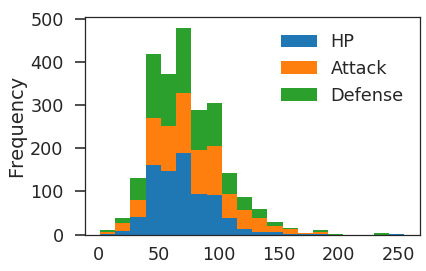

In [81]:
#fig = plt.figure(figsize=(10,5))
plt.figure()
df_3 = df2[['HP','Attack','Defense']]
df_3.plot.hist(stacked=True, bins=20)

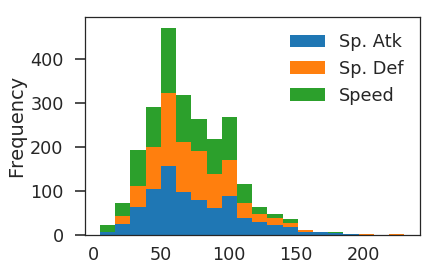

In [82]:
#fig = plt.figure(figsize=(10,5))
plt.figure()
df_3 = df2[['Sp. Atk','Sp. Def','Speed']]
df_3.plot.hist(stacked=True, bins=20)

[Text(0.5,0,'')]

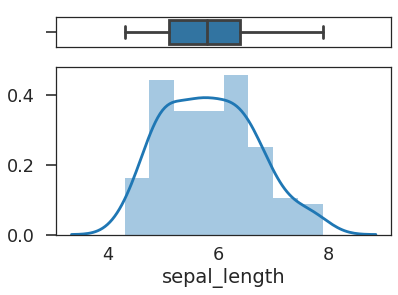

In [59]:
# Import library and dataset
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')
 
# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(df["sepal_length"], ax=ax_box)
sns.distplot(df["sepal_length"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
